In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [93]:
df=pd.read_csv("C:\\Users\\SAMPATH\\Downloads\\archive(19)\\ford.csv")

In [94]:
#CHECKING FIRST FIVE ROWS
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [95]:
df.shape
#THERE ARE 17966 ROWS AND 9 COLUMNS

(17966, 9)

### checking for null values

In [96]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

### Data analysis


In [97]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [98]:
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.636009,-0.707818,0.298506,-0.022967,-0.137311
price,0.636009,1.000000,-0.530659,0.406857,-0.346419,0.411178
mileage,-0.707818,-0.530659,1.000000,-0.260451,0.120075,0.215035
tax,0.298506,0.406857,-0.260451,1.000000,-0.502980,0.184363
mpg,-0.022967,-0.346419,0.120075,-0.502980,1.000000,-0.260521
engineSize,-0.137311,0.411178,0.215035,0.184363,-0.260521,1.000000


#### Let us drop some unwanted columns

In [99]:
df=df.drop(["year","model"],axis=1)

In [100]:
df["engineSize"].value_counts()

1.0    7765
1.5    3418
2.0    3311
1.2    1626
1.6     923
1.1     559
1.4     112
2.3      80
0.0      51
5.0      45
1.8      35
2.2      13
2.5      13
1.3      13
3.2       1
1.7       1
Name: engineSize, dtype: int64

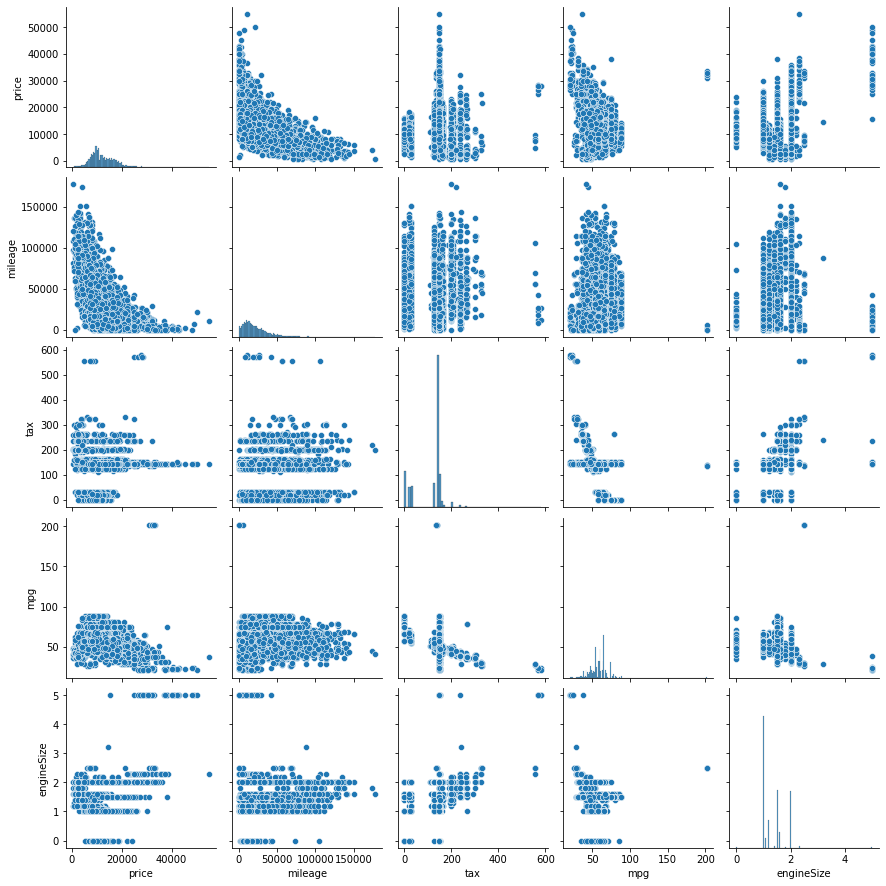

In [101]:
sns.pairplot(data=df)

#### since the data have categorical and numerical columns pair plot doesnot give much information, so lets plot seperately  

 #### By  using barplot let us plot some categorical data vs price

<function matplotlib.pyplot.show(close=None, block=None)>

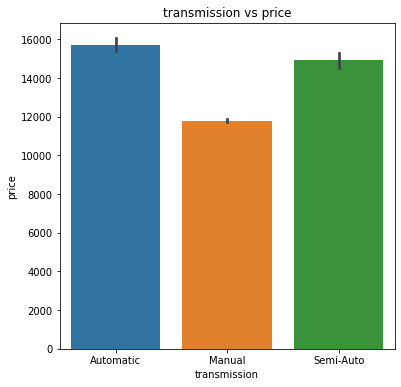

In [102]:
plt.figure(figsize=(6,6))
sns.barplot(x="transmission",y="price",data=df).set(title="transmission vs price")
plt.show

[Text(0.5, 1.0, 'Fuel Type vs Price')]

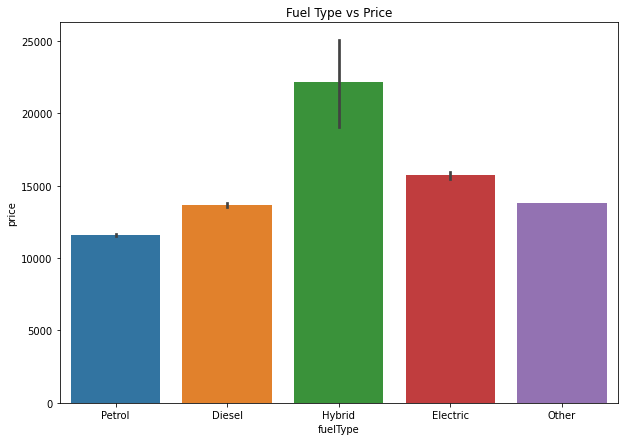

In [103]:
#NOW LET US CHECK THE RELATION BETWEEN MODEL AND PRICE BY PLOTTING
plt.figure(figsize=(10,7))
sns.barplot(x="fuelType",y="price",data=df).set(title="Fuel Type vs Price")

#### BY USING SCATTER PLOT LET US PLOT THE FOLLOWING CONTINOUS NUMERICAL DATA VS PRICE


<AxesSubplot:xlabel='mileage', ylabel='price'>

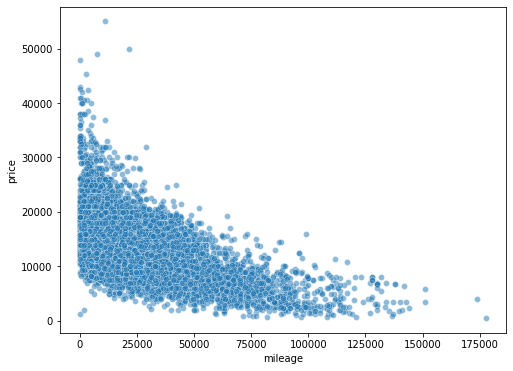

In [104]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="mileage",y="price",data=df,alpha=0.5)

<AxesSubplot:xlabel='price', ylabel='mpg'>

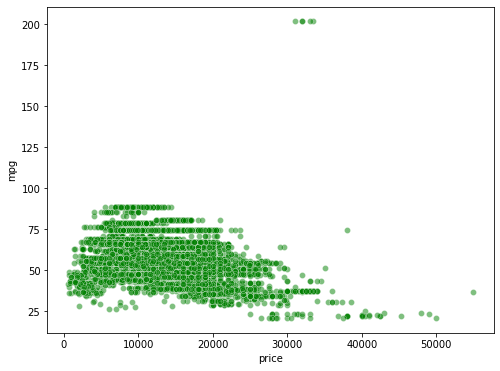

In [106]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="price",y="mpg",data=df,alpha=0.5,color="green")

In [105]:
df.head()

,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,12000,Automatic,15944,Petrol,150,57.7,1.0
1,14000,Manual,9083,Petrol,150,57.7,1.0
2,13000,Manual,12456,Petrol,150,57.7,1.0
3,17500,Manual,10460,Petrol,145,40.3,1.5
4,16500,Automatic,1482,Petrol,145,48.7,1.0


### One hot encoding to fix categorical columns

In [107]:
def one_hot_encode(df,column):

    dummies=pd.get_dummies(df[column],prefix=column)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [109]:
df=one_hot_encode(df,"transmission")
df=one_hot_encode(df,"fuelType")
df.head()

,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,12000,15944,150,57.7,1.0,1,0,0,0,0,0,0,1
1,14000,9083,150,57.7,1.0,0,1,0,0,0,0,0,1
2,13000,12456,150,57.7,1.0,0,1,0,0,0,0,0,1
3,17500,10460,145,40.3,1.5,0,1,0,0,0,0,0,1
4,16500,1482,145,48.7,1.0,1,0,0,0,0,0,0,1


### Creating heat map

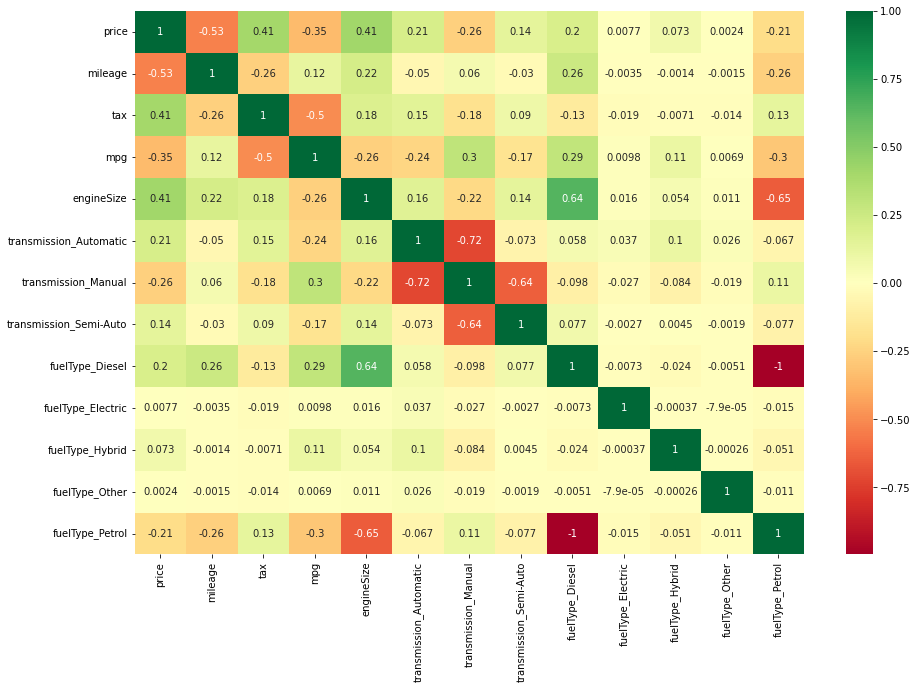

In [110]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(15,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [111]:
X=df.drop("price",axis=1)
y=df["price"]

### Feauture Importance


In [113]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [114]:
print(model.feature_importances_)

[3.51273918e-01 1.56522579e-01 1.66971092e-01 2.16196679e-01
 4.81283791e-03 3.40364130e-02 4.26786494e-03 6.21700218e-03
 1.27680716e-05 3.34551622e-04 3.34014810e-06 5.93509537e-02]


### Plotting graph of feature importances for better visualization

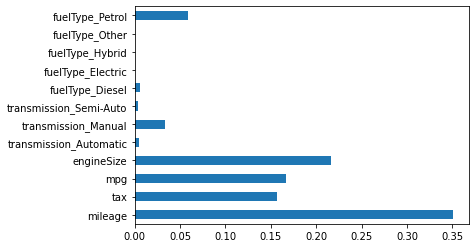

In [115]:
feat_imp=pd.Series(model.feature_importances_,index=X.columns)
feat_imp.plot(kind="barh")
plt.show()

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [117]:
X_train

,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
17963,7010,20,67.3,1.6,0,1,0,1,0,0,0,0
15937,40424,145,53.3,2.0,0,1,0,1,0,0,0,0
6627,7663,145,54.3,1.5,0,1,0,1,0,0,0,0
11288,5698,145,57.7,1.0,0,1,0,0,0,0,0,1
7905,13284,145,74.3,1.5,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9368,34000,125,52.3,1.0,0,1,0,0,0,0,0,1
17713,22029,0,65.7,1.0,0,1,0,0,0,0,0,1
12594,55035,125,60.1,2.0,0,1,0,1,0,0,0,0
106,16310,125,50.4,1.0,0,1,0,0,0,0,0,1


In [118]:
from sklearn.ensemble import RandomForestRegressor

### Randomized search CV

In [122]:
#number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#number of features to consider at each split
max_features=["auto","sqrt"]


In [124]:
#creating random grid
random_grid={"n_estimators":n_estimators,"max_features":max_features}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt']}


In [125]:
from sklearn.model_selection import RandomizedSearchCV

In [129]:
rf=RandomForestRegressor()

In [130]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=10,cv=5,verbose=2,random_state=101)

In [131]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................max_features=sqrt, n_estimators=800; total time=  17.0s
[CV] END ................max_features=sqrt, n_estimators=800; total time=  16.7s
[CV] END ................max_features=sqrt, n_estimators=800; total time=  17.7s
[CV] END ................max_features=sqrt, n_estimators=800; total time=  15.7s
[CV] END ................max_features=sqrt, n_estimators=800; total time=  15.5s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ...............max_features=auto, n_estimators=1100; total time=  39.8s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ...............max_features=auto, n_estimators=1100; total time=  43.9s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ...............max_features=auto, n_estimators=1100; total time=  43.9s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ...............max_features=auto, n_estimators=1100; total time=  46.6s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ...............max_features=auto, n_estimators=1100; total time=  40.5s
[CV] END ...............max_features=sqrt, n_estimators=1000; total time=  19.0s
[CV] END ...............max_features=sqrt, n_estimators=1000; total time=  19.2s
[CV] END ...............max_features=sqrt, n_estimators=1000; total time=  19.3s
[CV] END ...............max_features=sqrt, n_estimators=1000; total time=  18.8s
[CV] END ...............max_features=sqrt, n_estimators=1000; total time=  18.9s
[CV] END ................max_features=sqrt, n_estimators=700; total time=  13.5s
[CV] END ................max_features=sqrt, n_estimators=700; total time=  13.5s
[CV] END ................max_features=sqrt, n_estimators=700; total time=  13.6s
[CV] END ................max_features=sqrt, n_estimators=700; total time=  14.3s
[CV] END ................max_features=sqrt, n_estimators=700; total time=  13.4s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=800; total time=  27.5s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=800; total time=  29.0s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=800; total time=  28.3s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=800; total time=  28.0s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=800; total time=  27.9s
[CV] END ................max_features=sqrt, n_estimators=900; total time=  17.5s
[CV] END ................max_features=sqrt, n_estimators=900; total time=  16.8s
[CV] END ................max_features=sqrt, n_estimators=900; total time=  17.1s
[CV] END ................max_features=sqrt, n_estimators=900; total time=  17.2s
[CV] END ................max_features=sqrt, n_estimators=900; total time=  17.8s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=300; total time=  11.3s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=300; total time=  10.1s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=300; total time=  10.3s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=300; total time=  10.4s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=300; total time=  10.7s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=400; total time=  14.4s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=400; total time=  14.5s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=400; total time=  14.5s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=400; total time=  13.4s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=400; total time=  13.6s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=200; total time=   6.8s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=200; total time=   8.6s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=200; total time=   7.9s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=200; total time=   8.1s


c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ................max_features=auto, n_estimators=200; total time=   6.8s
[CV] END ................max_features=sqrt, n_estimators=300; total time=   6.1s
[CV] END ................max_features=sqrt, n_estimators=300; total time=   5.7s
[CV] END ................max_features=sqrt, n_estimators=300; total time=   5.7s
[CV] END ................max_features=sqrt, n_estimators=300; total time=   5.7s
[CV] END ................max_features=sqrt, n_estimators=300; total time=   5.7s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=101, scoring='neg_mean_squared_error',
                   verbose=2)

In [132]:
pred=rf_random.predict(X_test)

In [133]:
pred

array([17580.38111111,  8234.89555556, 15609.27      , ...,
       14013.3612963 ,  6321.41444444,  7022.41222222])

c:\users\sampath\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

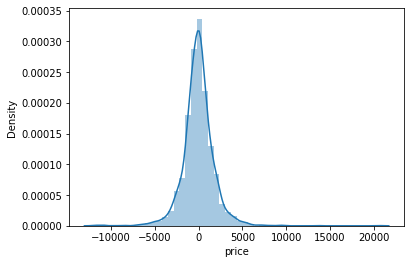

In [135]:
sns.distplot(y_test-pred)

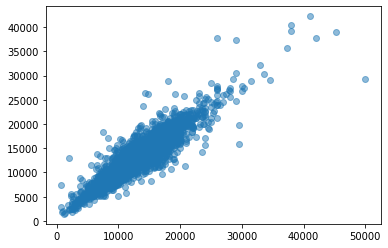

In [137]:
plt.scatter(y_test,pred,alpha=0.5)

In [138]:
import pickle
file=open("random_forest_reg_model.pkl","wb")
pickle.dump(rf_random,file)